# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [3]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

# load json file using open()
O=open('/Users/Tshering Gyeltshen/Desktop/Assignments/yearinfo.json')
yearinfo=json.load(O)
yearinfo


{'2010': [{'band_singer': ['Kesha'],
   'song': ['/wiki/Tik_Tok_(song)'],
   'songurl': ['Tik Tok (song)'],
   'ranking': 1,
   'titletext': '"Tik Tok"',
   'url': ['/wiki/Kesha']},
  {'band_singer': ['Lady Antebellum'],
   'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
   'songurl': ['Need You Now (Lady Antebellum song)'],
   'ranking': 2,
   'titletext': '"Need You Now"',
   'url': ['/wiki/Lady_Antebellum']},
  {'band_singer': ['Train (band)'],
   'song': ['/wiki/Hey,_Soul_Sister'],
   'songurl': ['Hey, Soul Sister'],
   'ranking': 3,
   'titletext': '"Hey, Soul Sister"',
   'url': ['/wiki/Train_(band)']},
  {'band_singer': ['Katy Perry', 'Snoop Dogg'],
   'song': ['/wiki/California_Gurls'],
   'songurl': ['California Gurls'],
   'ranking': 4,
   'titletext': '"California Gurls"',
   'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
  {'band_singer': ['Usher (musician)', 'Will.i.am'],
   'song': ['/wiki/OMG_(Usher_song)'],
   'songurl': ['OMG (Usher song)'],
   'ranking': 5,


In [4]:
# To check keys in yearinfo json file
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [5]:
# To check how many values(song) in year 2021 
len(yearinfo['2021'])

100

In [6]:
# print name of columns in year 2021
yearinfo['2021'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [7]:
# print names of columns in year 2010
yearinfo['2010'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [8]:
# to check values and format of each values in each columns
yearinfo['2021'][0].values()

dict_values([['Dua Lipa'], ['/wiki/Levitating_(song)'], ['Levitating (song)'], 1, '"Levitating"', ['/wiki/Dua_Lipa']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

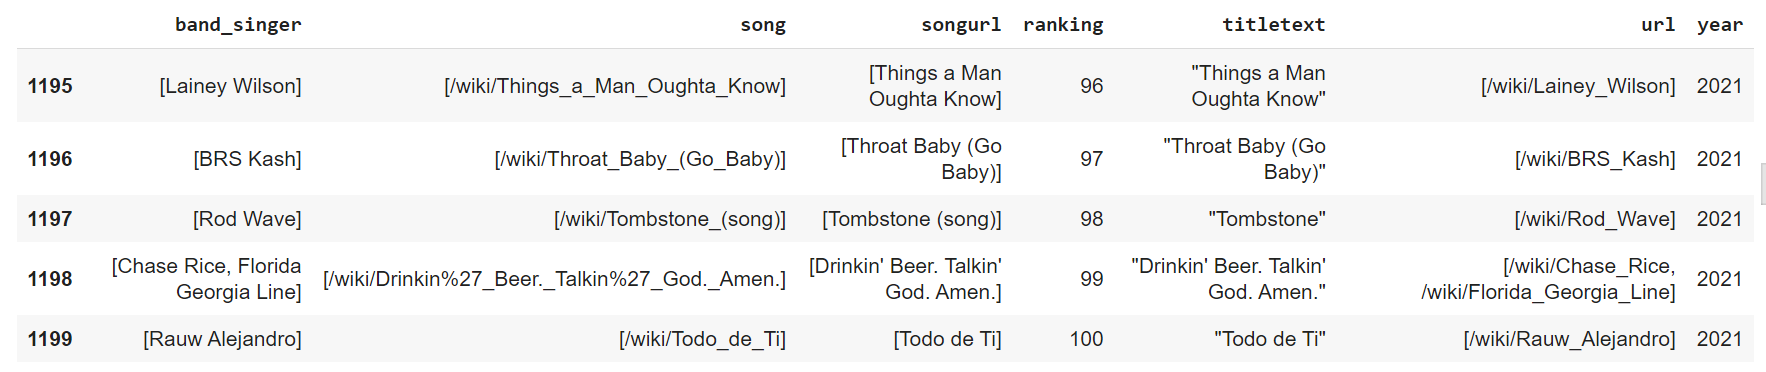

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [9]:
#write your code here
# Creating list
yearinfo_list = []
for key, values in yearinfo.items():
  for i in values:
    yearinfo_list.append(list(i.values()) + [key])
type(yearinfo_list) 


list

In [10]:
#Converting list to DataFrame
df = pd.DataFrame(yearinfo_list)
df.head()

0                                            1  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                       2  3                   4  \
0                       [Tik Tok (song)]  1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]  2      "Need You Now"   
2                     [Hey, Soul Sister]  3  "Hey, Soul Sister"   
3                     [California Gurls]  4  "California Gurls"   
4                     [OMG (Usher song)]  5               "OMG"   

                                           5     6  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [11]:
# naming all columns
df.columns = ['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url','year']
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [12]:
# checking for null
df.isnull().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [13]:
# checking data types
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [14]:
# year is in int. changing data type
df.year = df.year.astype('int')


In [15]:
# checking data types
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int32
dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [16]:
#Write your program and plot bar graph
#Sorting band_singer in list
List = []
for values in df['band_singer']:
  List.append(values)
print(List)


[['Kesha'], ['Lady Antebellum'], ['Train (band)'], ['Katy Perry', 'Snoop Dogg'], ['Usher (musician)', 'Will.i.am'], ['B.o.B', 'Hayley Williams'], ['Eminem', 'Rihanna'], ['Lady Gaga'], ['Taio Cruz'], ['Taio Cruz', 'Ludacris'], ['B.o.B', 'Bruno Mars'], ['Enrique Iglesias', 'Pitbull (rapper)'], ['Young Money', 'Lloyd (singer)'], ['Jason Derulo'], ['Rihanna'], ['Lady Gaga', 'Beyoncé'], ['Katy Perry'], ['Bruno Mars'], ['Mike Posner'], ['The Black Eyed Peas'], ['Jay-Z', 'Alicia Keys'], ['Usher (musician)', 'Pitbull (rapper)'], ['Travie McCoy', 'Bruno Mars'], ['Eminem'], ['Iyaz'], ['David Guetta', 'Akon'], ['The Script'], ['Kesha'], ['The Black Eyed Peas'], ['Owl City'], ['Trey Songz', 'Fabolous'], ['Drake (rapper)'], ['Lady Gaga'], ['Jason Derulo'], ['Nelly'], ['Ludacris'], ['Far East Movement', 'The Cataracs', 'Dev (singer)'], ['Timbaland', 'Justin Timberlake'], ['Michael Bublé'], ['Flo Rida', 'David Guetta'], ['Jay Sean', 'Lil Wayne'], ['La Roux'], ['Jason Derulo'], ['Justin Bieber', 'Luda

In [17]:
# Flatten the nested list to single list
newList = [item for elem in List for item in elem]
newList[:2] 
# Showing first two item from single list

['Kesha', 'Lady Antebellum']

In [18]:
# Converting list to DataFrame
singerdf = pd.DataFrame(newList)
singerdf.columns = ['band_singer']
singerdf.head()

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

In [19]:
# replacing old column dataframe with new dataframe 
df['band_singer'] = singerdf['band_singer']
df.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [20]:
#displaying highest frequency band_singer
bestsinger = df['band_singer'].value_counts()[:20]
bestsinger

Rihanna             31
Drake (musician)    29
Nicki Minaj         25
Taylor Swift        18
Lil Wayne           18
Chris Brown         17
Maroon 5            16
Justin Bieber       16
Bruno Mars          16
Katy Perry          15
Usher (musician)    13
Pitbull (rapper)    12
Kesha               11
Adele               11
Calvin Harris       11
Ariana Grande       11
Drake (rapper)      11
The Weeknd          11
Jason Derulo        10
Wiz Khalifa         10
Name: band_singer, dtype: int64

Text(0, 0.5, 'Frequencies')

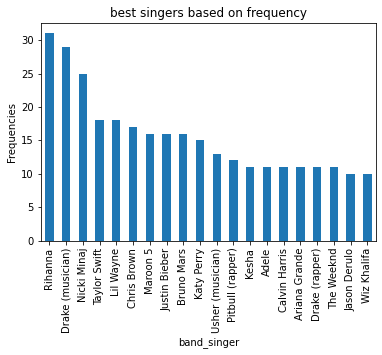

In [21]:
# ploting bar graph
data = pd.DataFrame(bestsinger)
data['band_singer'].plot(kind="bar")
plt.title("best singers based on frequency")
plt.xlabel("band_singer")
plt.ylabel("Frequencies")

In [22]:
data.columns

Index(['band_singer'], dtype='object')

**Question: Who is the most profilic singer?**


### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [23]:
#write your code here
# creating new Metric Dataframe
metricdf = df
metricdf.head()


band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [24]:
# Fetching single ranking value
ranking = metricdf.ranking[0]
type(ranking)
print(type(ranking)) 

<class 'numpy.int64'>


In [25]:
# Creating new score column
def get_ranking(ranking):
  score = 101 - ranking
  return score

metricdf['score'] = metricdf.ranking.map(get_ranking)
metricdf.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  score  
0                              [/wiki/Kesha]  2010    100  
1                    [/wiki/Lady_Antebellum]  2010     99  
2                       [/wiki/Train_(band)]  2010     98  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010     97  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010     96

In [26]:
# Sorting score column like decending
metricdf.sort_values(['score'],ascending = False, inplace = True)
metricdf.head()

band_singer                         song                songurl  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

In [27]:
# Creating new dataframe
total_data = metricdf[['band_singer','score']]
total_data.head()

band_singer  score
0                Kesha    100
100          Shontelle    100
1100          Yo Gotti    100
1000  Usher (musician)    100
900       Shawn Mendes    100

In [28]:
# Total score of band_singer
total_score = total_data.groupby('band_singer').sum()
T = total_score.sort_values(by = 'score', ascending = False)
T = T['score'][:20]
# Selecting Top 20 singers

Text(0.5, 1.0, 'Top 20 singers')

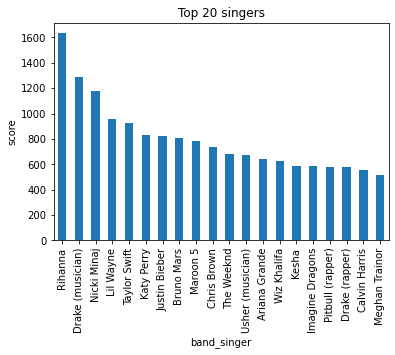

In [29]:
# Ploting bar plot
top20 = pd.DataFrame(T)
top20['score'].plot(kind = "bar")
plt.ylabel('score')
plt.title("Top 20 singers")

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [30]:
# what is the best song in the year 2010?

In [31]:
# Total groups
len(df.groupby('year'))

12

In [32]:
df.head()

band_singer                         song                songurl  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

Text(0.5, 1.0, 'best 20 songs in year 2010')

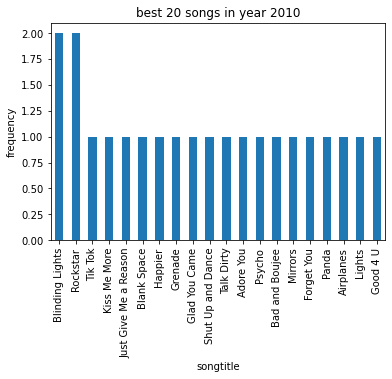

In [33]:
songs = [] #creating list
for song in df['titletext']:
    s = song
    songs.append(s.strip('"'))#strip is used to remove "" from titletext
type(songs)
data = pd.DataFrame(songs) #creating Dataframe
data.columns = ['titletext']
df['titletext'] = data['titletext'] #replacing old coloumn with new data
title = df.groupby('year') #group by year
title = title.get_group(2010) 
title = title['titletext'].value_counts(sort = True)[:20] 
new_title = pd.DataFrame(title)
new_title['titletext'].plot(kind = "bar")
plt.ylabel('frequency')
plt.xlabel('songtitle')
plt.title("best 20 songs in year 2010")

## SUBMISSION DATE: 2nd April 2022 